In [603]:
# change this to add/remove libraries needed
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import chi2_contingency
from collections import defaultdict
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Midterm Project for DATA 30100- Autumn 2024 (due December 10)

This is not a group project. You may discuss the project with other students but you should code and write the report independently. You should acknowledge any help in writing. The score will be based on:
-  Clarity and soundness of the arguments and conclusions; 
-  Use of data to back up arguments and analysis quality;  
-  Insightfulness of the results;
-  Quality of the EDA, statistical analyses, and overall presentation. Make sure you use headings, captions for figures and tables etc. When you interpret a graph or data from a table, you should clearly specify which figure/table you refer to.

For this project, you are tasked to use the [National Crime Victimization Survey (NCVS)](https://www.icpsr.umich.edu/web/NACJD/studies/38090/summary). The NCVS gathers data about personal and household crimes since 1973. The primary goals of the survey are to collect information about the victims, to explore the consequences of crime, and to estimate the number and types of crimes that go unreported.

Information about the study and data can be found in the attached pdf.

The goal of this project is to gain insight into crime victimization using the tools you have learned so far in this class.

### The Data 

You can (but are not required to) use any additional data you can find to get insight into this issue, but you need to specify the provenance of that data in your report. Some potential options include:

- NCVS Series and Supplements, https://www.icpsr.umich.edu/web/NACJD/series/95
- Annual Survey of Jails 2020, https://www.icpsr.umich.edu/web/NACJD/studies/38408
- National Prisoner Statistics, https://www.icpsr.umich.edu/web/NACJD/studies/38249
- American Community Survey, https://www.census.gov/programs-surveys/acs/

There is a plethoral of data collected in the NCVS, and we have cleaned and selected a portion of the data for your use in this project. That data is provided on Canvas (the `NCVS_2020.csv` file). Also provided on Canvas is a codebook (an Excel file containing information about each variable) created by your instructor as well as a codebook from the study itself giving additional information about the data and data collection methods that will be useful to answer some of the questions below. The preprocessed data provided has 8044 rows (first row is the name of the columns, and there are 8043 rows of data) and 81 columns. 

In [44]:
# read the data - make sure you specify the proper path to the file
proj_df=pd.read_csv('NCVS_2020.csv')
proj_df.shape

(8043, 81)

In [45]:
# a sample of 10 rows
proj_df.sample(10)

,YEARQ,IDHH,ICPSR,PANEL_ROT_GROUP,URBANICITY,LIV_TYPE,UNITS,OUTSIDE,GATED,RESTRICTED,...,ACTIVE_DUTY,JOB_WEEK,JOB_6MO,JOB_2WEEK,JOB,EMP_TYPE,JOB_LOC,JOB_COLLEGE,ATT_COLLEGE,NUM_INCIDENTS
3577,2020.2,1.836400e+24,12,65,2,1,5,1,2,2,...,8,1,9,9,98,8,8,8,1,5
4751,2020.3,1.788950e+24,8,22,2,1,1,9,2,2,...,1,1,9,9,4,1,1,2,4,1
4074,2020.3,1.659360e+24,12,31,2,1,1,9,2,2,...,9,9,9,9,99,9,9,9,0,1
7446,2020.4,1.925840e+24,4,47,2,1,1,9,2,2,...,1,2,2,9,99,9,9,9,4,1
2546,2020.2,1.602790e+24,11,61,2,1,1,9,2,2,...,1,1,9,9,5,1,2,2,4,2
979,2020.1,1.763010e+24,8,32,2,1,1,9,2,2,...,1,1,9,9,4,4,4,2,4,1
1466,2020.1,1.840940e+24,7,34,2,1,5,1,2,2,...,1,1,9,9,4,1,2,2,4,1
3115,2020.2,1.713720e+24,10,62,2,1,6,2,1,1,...,1,1,9,9,2,1,2,2,4,1
7692,2020.4,1.955690e+24,4,47,2,1,1,9,2,2,...,1,1,9,9,27,1,4,1,1,2
7888,2020.4,1.976560e+24,9,46,2,1,1,9,2,2,...,4,2,1,1,27,1,4,2,4,2


In [49]:
IDHH=pd.read_csv('IDHH.csv')

proj_df['IDHH'] = IDHH.loc[proj_df.index,'IDHH']
proj_df.head()


,YEARQ,IDHH,ICPSR,PANEL_ROT_GROUP,URBANICITY,LIV_TYPE,UNITS,OUTSIDE,GATED,RESTRICTED,...,ACTIVE_DUTY,JOB_WEEK,JOB_6MO,JOB_2WEEK,JOB,EMP_TYPE,JOB_LOC,JOB_COLLEGE,ATT_COLLEGE,NUM_INCIDENTS
0,2020.1,1602014158353447564559137,9,37,2,1,6,1,2,2,...,1,1,9,9,11,3,1,2,4,1
1,2020.1,1602071958685392584549331,9,31,1,12,6,2,2,2,...,1,2,1,1,23,1,3,2,1,2
2,2020.1,1602071958685392584549331,9,31,1,12,6,2,2,2,...,1,2,1,1,23,1,3,2,1,2
3,2020.1,1602071965133498564549121,5,21,2,1,1,9,2,2,...,1,1,9,9,12,3,1,1,4,1
4,2020.1,1602073503395389564538237,5,37,2,1,1,9,2,2,...,4,1,9,9,26,1,4,2,4,1


### The Assignment

#### Report on your findings about victimization. 
Imagine you are serving as a consultant who wants to recommend directions for future research, propose modifications in public policy, or suggest how one can reduce victimization and its consequences.

**You must submit two files:** 

1. The Jupyter Notebook that contains all the code you use for the analysis. You do not need to submit data you used, but just indicate how you obtained it in the Notebook.

2. A report of your findings **(in a .pdf file). This report should be at most 4 pages long including references.** Use data visualization, data summaries, and statistical analysis to justify your conclusions. Note that the page limitation means you will not show all analyses and plots you will make - select carefully what you think is most relevant.

The report should address the following points:

A.  **Introduce the dataset**.  Describe the data. Where does it come from? Why was it collected (what are the researchers interested in studying)? Was it an experiment or an observational study? Describe the sampling process. How many variables are there? List a few. How many observations (i.e., rows)? How many distinct households? Using what you have learned about data collection, is this a biased or unbiased sample? Why?

B.  **Characteristics of sample**. Describe the sample of people and households in the dataset.  Summarize the distributions of 3 or more of the characteristics (variables) of the people and households.  Some interesting variables you may consider include: marital status, employment, age, income etc. Choose at least 1 categorical and 1 numerical variable. You could include a graph or table for each distribution. 

C. **Relationships between variables.**  Now, shift focus from distributions of single variables to relationships between variables. You should investigate at least 2 of the individual or household characteristics (race, sex, education...) and at least two of the crime related variables.  For example, do you find evidence that those with levels of education are victims of less crime?  Describe any associations you find and the methods you use to investigate their significance. 

D. **Provide context**  To the best of your knowledge, what do the relationships you discovered imply? Do you think the associations are causal? What are some potential confounders that may explain the relationships?  What are some questions that you would like to answer but are unable to with the current data set alone?  What data would you need to be able to answer them?

E. **Conclusion/Self-Assessment** What did you learn from analyzing this dataset?

Your submission is to be uploaded to Canvas.  
There are some minimum requirements for your submission:

1. Upload your report in PDF format to Canvas. 
2. Upload the Jupyter notebook containing your analysis code to Canvas.
3. The report should be 4 pages maximum, including bibliography, tables and figures.
4. If your report uses outside results and/or data, proper citations must be provided.
    


### 1. Check Duplicates

In [64]:
print(f'The size selected a portion of the data: {proj_df.shape}')

U_df = proj_df.drop_duplicates()
if U_df.shape[0] != proj_df.shape[0]: print(f'There are dupllicate!')

print(f'The size of unique data: {U_df.shape}')

print(f'The number of unique household: {len(proj_df['IDHH'].unique())}')


The size selected a portion of the data: (8043, 81)
There are dupllicate!
The size of unique data: (6493, 81)
The number of unique household: 6025


### 2. Some household Characteristics

The ratios of urbanicity:
 Urban:Suburban:Rural = 1.26:4.86:1


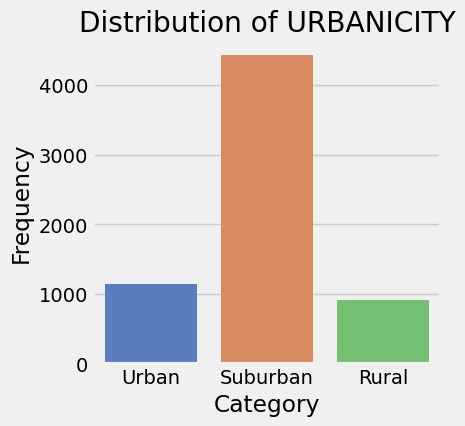

In [585]:
urbanicity_mapping = {1:'Urban', 2:'Suburban', 3:'Rural', 8:'Residue', -1: 'Invalid until 2020 Q1', 9: 'Out of universe'
}
URBANICITY = U_df['URBANICITY']
counts = Counter(URBANICITY)
sc = sorted(counts.items())
ind = [urbanicity_mapping[key[0]] for key in sc]
val = [key[1] for key in sc]
print(f'The ratios of urbanicity:\n Urban:Suburban:Rural = {val[0]/val[2]:.2f}:{val[1]/val[2]:.2f}:1')

plt.figure(figsize=(4, 4))
sns.barplot(x=ind, y=val, palette='muted')
plt.title("Distribution of URBANICITY")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

URBANICITY  Rural  Suburban  Urban
REGION                            
Midwest     15.64     69.01  15.35
Northeast    7.52     55.01  37.47
South       22.44     69.42   8.14
West         7.82     71.43  20.75


<Figure size 400x400 with 0 Axes>

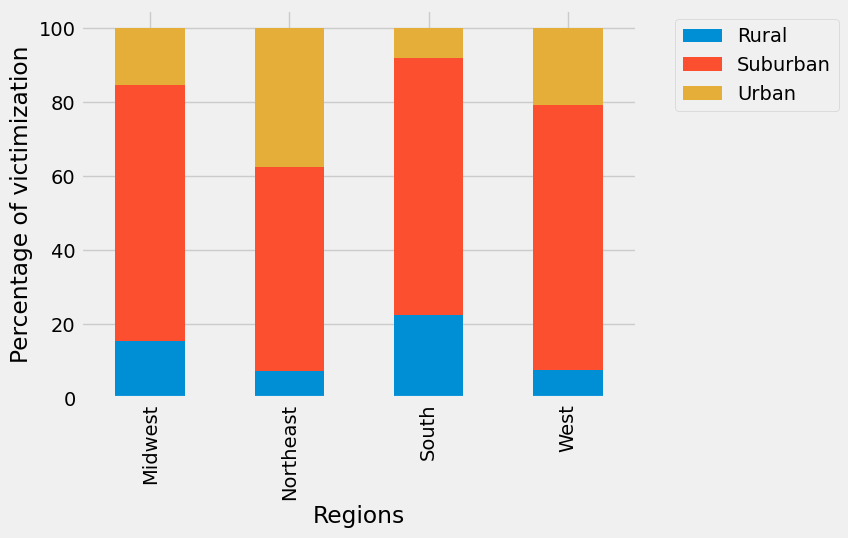

In [275]:
region_mapping = {
    1: "Northeast",
    2: "Midwest",
    3: "South",
    4: "West",
    -1: "Invalid until 1995 Q3"
}

house_loc = U_df[['URBANICITY', 'REGION']]
m_data = pd.DataFrame()

m_data['URBANICITY'] = house_loc['URBANICITY'].map(area_mapping)
m_data['REGION'] = house_loc['REGION'].map(region_mapping)
CT = pd.crosstab(m_data['REGION'], m_data['URBANICITY'])
CT = (CT.div(CT.sum(axis=1), axis=0) * 100).round(2)
print(CT)

plt.figure(figsize=(4, 4))
CT.plot(kind='bar', stacked=True)
plt.xlabel("Regions")
plt.ylabel("Percentage of victimization")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


The percentage of UNITS: [66.40997998  5.85245649  1.77113815  3.6038811   5.42122286 16.49468659
  0.24641922  0.20021562]


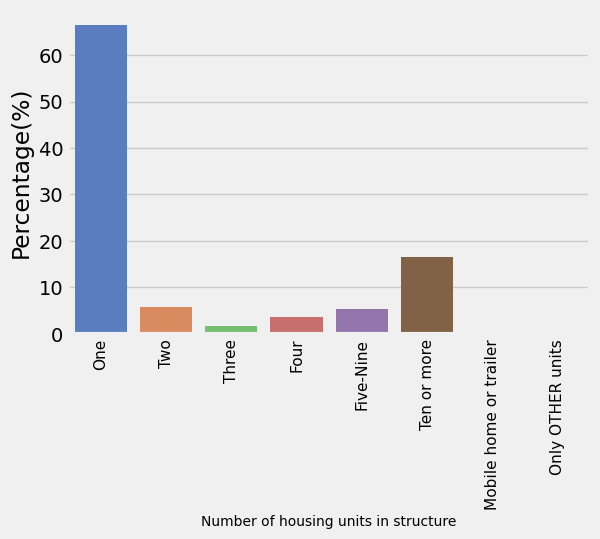

In [554]:
units_mapping = {1: 'One',
2: 'Two',
3: 'Three',
4: 'Four',
5: 'Five-Nine',
6: 'Ten or more',
7: 'Mobile home or trailer',
8: 'Only OTHER units',
98: 'Residue',
99: 'Out of universe'}

UNITS_num = U_df['UNITS']
counts = Counter(UNITS_num )
sc = sorted(counts.items())
ind = [units_mapping[key[0]] for key in sc]
val = [key[1] for key in sc]
val = np.array(val)/sum(val) * 100
print(f'The percentage of UNITS: {val}')

plt.figure(figsize=(6, 4))
sns.barplot(x=ind, y=val, palette='muted')
plt.xlabel("Number of housing units in structure", fontsize = 10)
plt.xticks(rotation=90, fontsize=11)
plt.ylabel("Percentage(%)", )
plt.show()


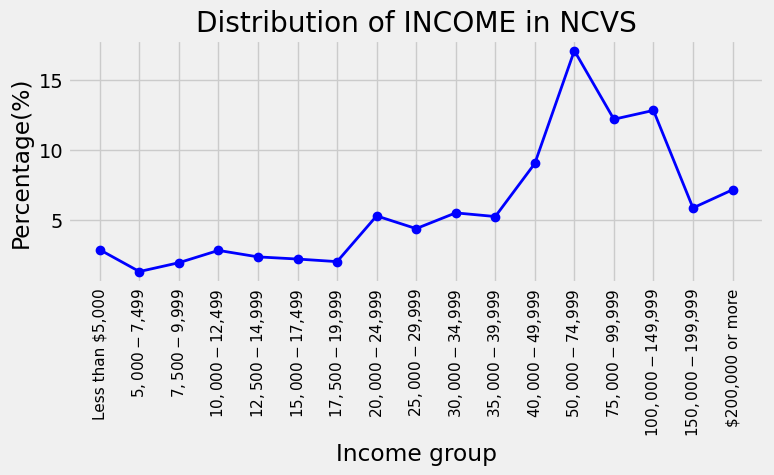

In [352]:
income_mapping= {1: 'Less than $5,000',
2: '$5,000 - $7,499',
3: '$7,500 - $9,999',
4: '$10,000 - $12,499',
5: '$12,500 - $14,999',
6: '$15,000 - $17,499',
7: '$17,500 - $19,999',
8: '$20,000 - $24,999',
9: '$25,000 - $29,999',
10: '$30,000 - $34,999',
11: '$35,000 - $39,999',
12: '$40,000 - $49,999',
13: '$50,000 - $74,999',
15: '$75,000 - $99,999',
16: '$100,000 - $149,999',
17: '$150,000 - $199,999',
18:'$200,000 or more',
98: 'Residue',
99: 'Out of universe'}
INCOME = U_df['INCOME']
counts = Counter(INCOME)
sc = sorted(counts.items())
ind = [income_mapping[key[0]] for key in sc]
val = [key[1] for key in sc]
val = np.array(val)/sum(val) * 100

plt.figure(figsize=(8, 3))
plt.plot(ind, val, color='blue', linewidth=2, marker='o')
plt.title("Distribution of INCOME in NCVS")
plt.xlabel("Income group")
plt.xticks(rotation=90, fontsize=11)
plt.ylabel("Percentage(%)", )
plt.show()

In [340]:
# regroup data to matching with US Census Bureau
l15000 = sum(val[0:5])
l25000 = sum(val[5:8])
l35000 = sum(val[8:10])
l50000 = sum(val[10:12])
regroup = [l15000, l25000, l35000, l50000]
regroup = regroup + list(val[12:])


In [ ]:
#https://www.statista.com/statistics/758502/percentage-distribution-of-household-income-in-the-us/
Census_Bureau2020 = pd.read_excel(
    'statistic_id758502_us-household-income-distribution-2006-2023.xlsx',
    sheet_name='Data',
    engine='openpyxl',  # Specify the engine for .xlsx files
    header=0,        # Read without assuming the first row is headers
    index_col=0,
    skiprows=4,         # Skip rows above the starting cell (row 2 in this case)
    usecols="B:K"       # Columns B to D
)


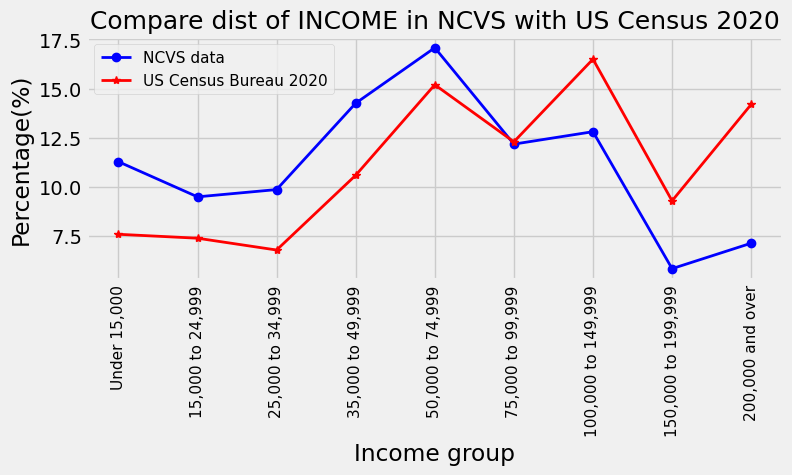

In [360]:
data = pd.DataFrame({
    'NCVS data': regroup,
    'US Census Bureau 2020': Census_Bureau2020.loc[2020,]
}, index=Census_Bureau2020.columns)

plt.figure(figsize=(8, 3))
plt.plot(data.index, data['NCVS data'], color='blue', linewidth=2, marker='o', label = 'NCVS data')
plt.plot(data.index, data['US Census Bureau 2020'], color='red', linewidth=2, marker='*', label = 'US Census Bureau 2020')
plt.title("Compare dist of INCOME in NCVS with US Census 2020", fontsize= 18)
plt.xlabel("Income group")
plt.xticks(rotation=90, fontsize=11)
plt.ylabel("Percentage(%)", )
plt.legend(loc='upper left', fontsize = 11)
plt.show()

<Figure size 800x400 with 0 Axes>

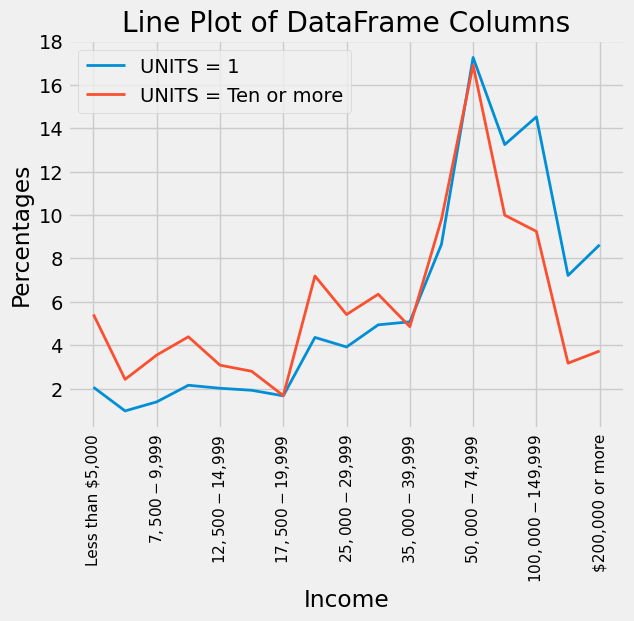

In [ ]:
RESTRICTED_Y = U_df.loc[U_df['UNITS']== 1, 'INCOME']
counts = Counter(RESTRICTED_Y)
sc = sorted(counts.items())
ind = [income_mapping[key[0]] for key in sc]
val = [key[1] for key in sc]
df1 = pd.DataFrame(val, index=ind, columns=['UNITS = 1'])
df1['UNITS = 1'] = df1['UNITS = 1']/sum(df1['UNITS = 1']) * 100

RESTRICTED_N = U_df.loc[U_df['UNITS']== 6, 'INCOME']
counts = Counter(RESTRICTED_N)
sc = sorted(counts.items())
ind = [income_mapping[key[0]] for key in sc]
val = [key[1] for key in sc]
df2 = pd.DataFrame(val, index=ind, columns=['UNITS = Ten or more'])
df2['UNITS = Ten or more']= df2['UNITS = Ten or more']/sum(df2['UNITS = Ten or more']) * 100

data = pd.concat([df1,df2], axis=1)

plt.figure(figsize=(8,4))
data.plot(linewidth=2)
plt.title("Income distribution by UNITS")
plt.xlabel("Income")
plt.xticks(rotation=90, fontsize=11)
plt.ylabel("Percentages")
plt.legend()
plt.show()

In [ ]:
# seperate at 50000 income

df = pd.concat([data.iloc[0:12,:].sum(), data.iloc[12:,:].sum()], axis=1)
df.columns = ['INCOME < 50000(%)', 'INCOME >= 50000(%)']
df


,INCOME < 50000(%),INCOME >= 50000(%)
UNITS = 1,39.146568,60.853432
UNITS = Ten or more,56.956116,43.043884


Ratio of victimization without restricted access VS  victimization with restricted access = 7.36:1


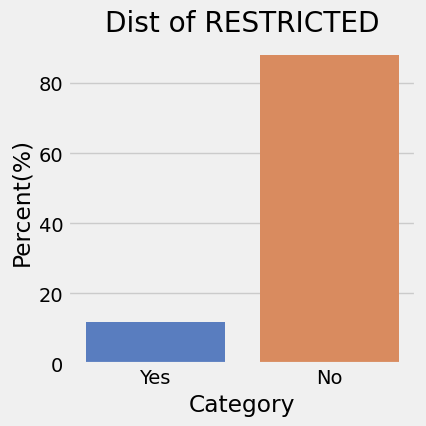

In [394]:
response_mapping = {
    1: "Yes",
    2: "No",
    8: "Residue",
    -1: "Invalid until 2004 Q1",
    9: "Out of universe"
}

RESTRICTED = U_df['RESTRICTED']
counts = Counter(RESTRICTED)
sc = sorted(counts.items())
ind = [response_mapping[key[0]] for key in sc]
val = [key[1] for key in sc]
print(f'Ratio of victimization without restricted access VS  victimization with restricted access = {val[1]/val[0]:.2f}:1' )
val = np.array(val)/sum(val) * 100

plt.figure(figsize=(4, 4))
sns.barplot(x=ind, y=val, palette='muted')
plt.title("Dist of RESTRICTED")
plt.xlabel("Category")
plt.ylabel("Percent(%)")
plt.show()


### 3. Some people Characteristics

In [573]:

marital_mapping = {
    1: "Married",
    2: "Widowed",
    3: "Divorced",
    4: "Separated",
    5: "Never married",
    8: "Residue",
    9: "Out of universe"
}

sex_mapping = {
    1: "Male",
    2: "Female",
    8: "Residue",
    9: "Out of universe"
}

race_mapping = {
    1: "White only",
    2: "Black only",
    3: "American Indian, Alaska native only",
    4: "Asian only",
    5: "Hawaiian/Pacific Islander only",
    6: "White-Black",
    7: "White-American Indian",
    8: "White-Asian",
    9: "White-Hawaiian/Pacific Islander",
    10: "Black-American Indian",
    11: "Black-Asian",
    12: "Black-Hawaiian/Pacific Islander",
    13: "American Indian-Asian",
    14: "Asian-Hawaiian/Pacific Islander",
    15: "White-Black-American Indian",
    16: "White-Black-Asian",
    17: "White-American Indian-Asian",
    18: "White-Asian-Hawaiian",
    19: "2 or 3 races",
    20: "4 or 5 races",
    98: "Residue",
    -1: "Invalid until 2003 Q1",
    99: "Out of universe"
}

hisp_mapping = {
    1: 'Yes',
    2: 'No',
    8: 'Residue',
    9: 'Out of universe'
}

U_df['AGE'].describe()
bins = [12, 18, 35, 50, 65, 100]  # Bin edges
labels = ['Teenager', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']
Age_Group = pd.cut(U_df['AGE'], bins=bins, labels=labels, right=False)

In [ ]:
data = U_df[['AGE', 'MARITAL', 'SEX','RACE', 'HISP']]
m_data = pd.DataFrame()
m_data['AGE'] = data['AGE']


# Map the categorical numbers to their actual categories
m_data["MARITAL"] = data["MARITAL"].map(marital_mapping)
m_data["SEX"] = data["SEX"].map(sex_mapping)
m_data["RACE"] = data["RACE"].map(race_mapping)
m_data["HISP"] = data["HISP"].map(hisp_mapping)

Ratio of No-Hispanic VS  Hispanic = 1.11 :1
There percentage distribution is: [47.38949638 52.61050362]


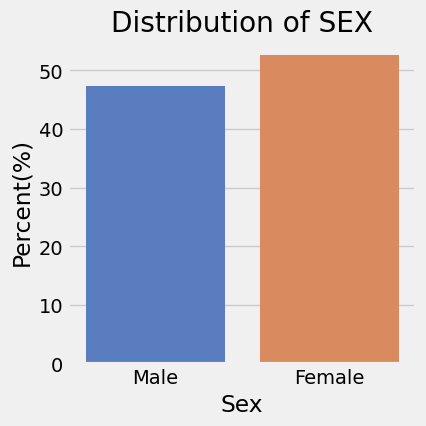

In [ ]:
SEX = U_df['SEX']
counts = Counter(SEX)
ind = counts.keys()
val = counts.values()
sc = sorted(counts.items())
ind = [sex_mapping[key[0]] for key in sc]
val = [key[1] for key in sc]
print(f'Ratio of No-Hispanic VS  Hispanic = {val[1]/val[0]:.2f} :1' )
val = np.array(val)/sum(val) * 100
print(f'There percentage distribution is: {val}')

plt.figure(figsize=(4, 4))
sns.barplot(x=ind, y=val, palette='muted')
plt.title("Distribution of SEX")
plt.xlabel("Sex")
plt.ylabel("Percent(%)")
plt.show()

Ratio of No-Hispanic VS  Hispanic = 0.14 :1
There percentage distribution is: [40.39735099  5.79085169 16.14045896  3.15724627 33.94424765  0.56984445]


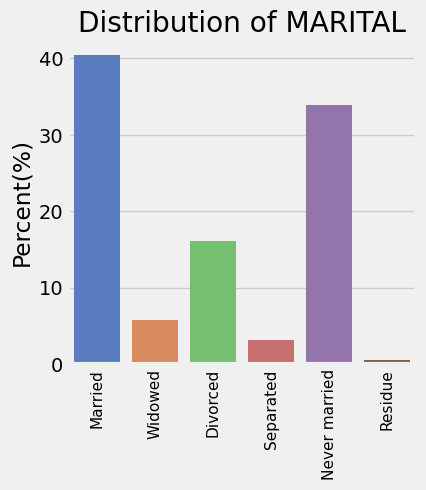

In [417]:
MARITAL = U_df['MARITAL']
counts = Counter(MARITAL)
ind = counts.keys()
val = counts.values()
sc = sorted(counts.items())
ind = [marital_mapping[key[0]] for key in sc]
val = [key[1] for key in sc]
print(f'Ratio of No-Hispanic VS  Hispanic = {val[1]/val[0]:.2f} :1' )
val = np.array(val)/sum(val) * 100
print(f'There percentage distribution is: {val}')

plt.figure(figsize=(4, 4))
sns.barplot(x=ind, y=val, palette='muted')
plt.title("Distribution of MARITAL")
plt.xticks(rotation=90, fontsize=11)
plt.ylabel("Percent(%)")
plt.show()


In [501]:
g1 = m_data.groupby('SEX')['AGE'].mean()

g2 = m_data.groupby('HISP')['AGE'].mean()

print(f'The average age by Sex:\n {g1}\n')
print(f'The average age by Hispanic Origin or not:\n{g2}')




The average age by Sex:
 SEX
Female    45.877049
Male      44.879428
Name: AGE, dtype: float64

The average age by Hispanic Origin or not:
HISP
No     46.228776
Yes    40.267261
Name: AGE, dtype: float64


In [499]:
age = pd.concat([g1.to_frame().T, g2.to_frame().T], axis=1)
age.columns = ['Female','Male', 'Not_Hispanic','Hispanic']
age

,Female,Male,Not_Hispanic,Hispanic
AGE,45.877049,44.879428,46.228776,40.267261


Ratio of No-Hispanic VS  Hispanic = 6.23 :1
There percentage distribution is: [13.83027876 86.16972124]


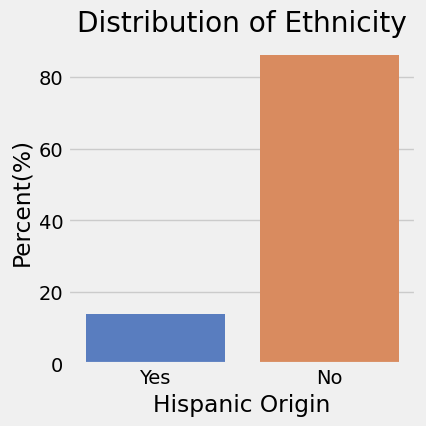

In [400]:
HISP = U_df['HISP']
counts = Counter(HISP)
ind = counts.keys()
val = counts.values()
sc = sorted(counts.items())
ind = [hisp_mapping[key[0]] for key in sc]
val = [key[1] for key in sc]
print(f'Ratio of No-Hispanic VS  Hispanic = {val[1]/val[0]:.2f} :1' )
val = np.array(val)/sum(val) * 100
print(f'There percentage distribution is: {val}')

plt.figure(figsize=(4, 4))
sns.barplot(x=ind, y=val, palette='muted')
plt.title("Distribution of Ethnicity")
plt.xlabel("Hispanic Origin")
plt.ylabel("Percent(%)")
plt.show()



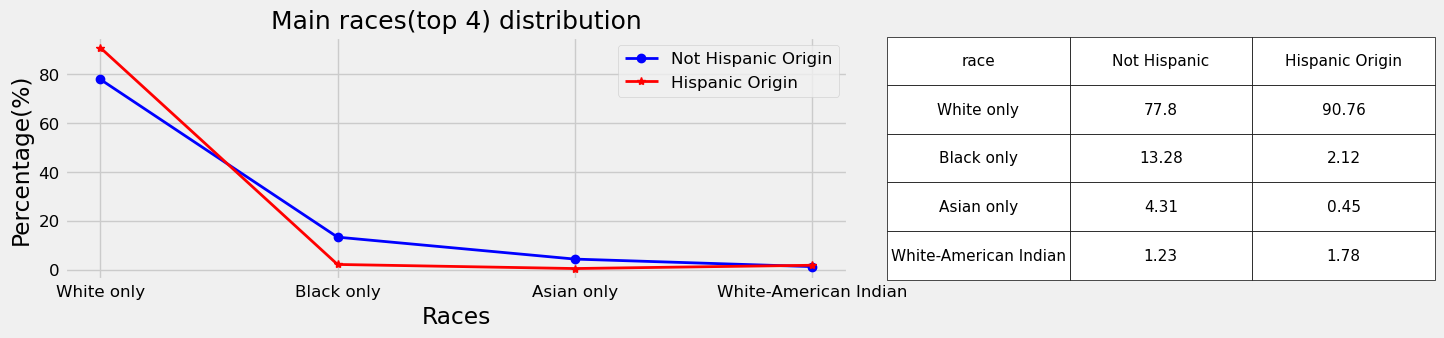

In [464]:
race_percent1 = m_data.loc[m_data['HISP']=='No', 'RACE'].value_counts(normalize=True) * 100
race_percent2 = m_data.loc[m_data['HISP']=='Yes', 'RACE'].value_counts(normalize=True) * 100
race_percent = pd.concat([race_percent1, race_percent2], axis=1)
race_percent.columns = ['Not Hispanic', 'Hispanic Origin']

data = race_percent.iloc[0:4,:].round(2)
data['race'] = ['White only','Black only','Asian only','White-American Indian']
data = data[['race','Not Hispanic', 'Hispanic Origin']]

#plt.figure(figsize=(12, 3))
fig, ax = plt.subplots(figsize=(9, 3))
ax.plot(race_percent.index[0:4], race_percent['Not Hispanic'][0:4], color='blue', linewidth=2, marker='o', label = 'Not Hispanic Origin')
ax.plot(race_percent.index[0:4], race_percent['Hispanic Origin'][0:4], color='red', linewidth=2, marker='*', label = 'Hispanic Origin')
ax.set_title("Main races(top 4) distribution", fontsize= 18)
ax.set_xlabel("Races")
ax.tick_params(labelsize=12)
ax.set_ylabel("Percentage(%)", )


# Adding the table
table = plt.table(
    cellText=data.values,
    colLabels=data.columns,
    cellLoc='center',
 #   rowLabels=race_percent.index[0:4],
    loc='center', 
    bbox=[1.05, 0, 0.7, 1])
table.auto_set_font_size(False)
table.set_fontsize(11)
ax.legend(loc='upper right', fontsize = 12)
plt.show()


In [480]:
race_percent['Not Hispanic']*0.8617

RACE
White only                             67.041646
Black only                             11.443130
Asian only                              3.711702
White-American Indian                   1.062686
American Indian, Alaska native only     0.970279
White-Black                             0.523643
White-Asian                             0.477439
Black-American Indian                   0.231019
Hawaiian/Pacific Islander only          0.215618
White-Hawaiian/Pacific Islander         0.154013
White-Black-American Indian             0.123210
2 or 3 races                            0.061605
Black-Asian                             0.046204
White-Black-Asian                       0.046204
Asian-Hawaiian/Pacific Islander         0.030803
White-American Indian-Asian             0.015401
4 or 5 races                            0.015401
Name: Not Hispanic, dtype: float64

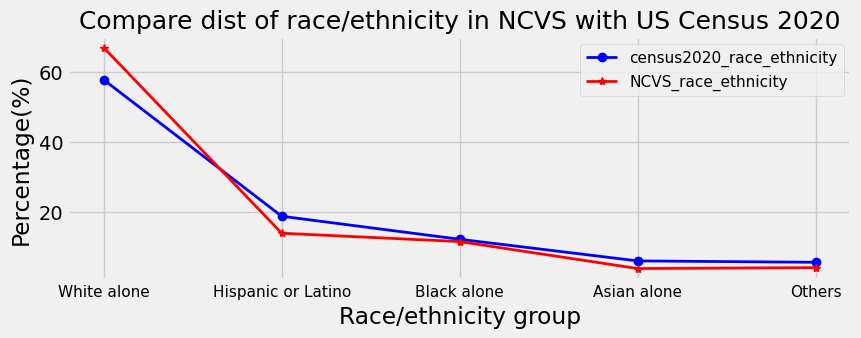

In [524]:
#https://www.census.gov/library/stories/2021/08/2020-united-states-population-more-racially-ethnically-diverse-than-2010.html
census2020race = pd.DataFrame({
    "White alone": 57.8,
    "Hispanic or Latino": 18.7,
    "Black alone": 12.1,
    "Asian alone": 5.9,
    "Others": 5.5
}, index= ['census2020race_ethnicity'])

NCVS_race_ethnicity = pd.DataFrame(
    {
    "White alone": 67.04,
    "Hispanic or Latino": 13.83,
    "Black alone": 11.44,
    "Asian alone": 3.71,
    "Others": 3.97
    }, index = ['NCVS_race_ethnicity']
)
plt.figure(figsize=(9, 3))
plt.plot(census2020race.columns, census2020race.loc['census2020race_ethnicity'], color='blue', linewidth=2, marker='o', label = 'census2020_race_ethnicity')
plt.plot(NCVS_race_ethnicity.columns, NCVS_race_ethnicity.loc['NCVS_race_ethnicity'], color='red', linewidth=2, marker='*', label = 'NCVS_race_ethnicity')
plt.title("Compare dist of race/ethnicity in NCVS with US Census 2020", fontsize= 18)
plt.xlabel("Race/ethnicity group")
plt.xticks(fontsize=11)
plt.ylabel("Percentage(%)", )
plt.legend(loc='upper right', fontsize = 11)
plt.show()

### 4. Relationship between individual or household characteristics and the crime related variables

In [579]:
missing_code = ['Residue', 'Out of universe']
def delete_missing(S1, S2):
    S1 = pd.Series(S1)
    S2 = pd.Series(S2)

    a = ~S1.isin(missing_code)
    b = ~S2.isin(missing_code)

    return S1[a&b], S2[a&b]

In [ ]:
V_H = ['URBANICITY', 'REGION', 'UNITS', 'INCOME']
V_P = ['SEX','RACE', 'HISP', 'ED']
V_C = ['STOLEN', 'WEAPON', 'FORCED_SEX', 'POLICE']

V_H_data = U_df[V_H]
V_H_data = V_H_data.astype("category")
V_P_data = U_df[V_P]
V_P_data = V_P_data.astype('category')
V_C_data = U_df[V_C]
V_C_data = V_C_data.astype('category')

In [599]:
crime_mapping={
    1: "Yes",
    2: "No",
    3: "Refused",
    8: "Residue",
    9: "Out of universe"
}
ed_mapping = {
    0: "Nev/kindergarten",
    1: "Elementary",
    2: "Elementary",
    3: "Elementary",
    4: "Elementary",
    5: "Elementary",
    6: "Elementary",
    7: "Elementary",
    8: "Elementary",
    9: "High school",
    10: "High school",
    11: "High school",
    12: "High school",
    21: "College",
    22: "College",
    23: "College",
    24: "College",
    25: "College",
    26: "College",
    27: "12th grade (no diploma)",
    28: "High school grad (Diploma or equivalent)",
    40: "Some college (no degree)",
    41: "Associate degree",
    42: "Bachelor degree",
    43: "Master degree",
    44: "Prof school degree",
    45: "Doctorate degree",
    98: "Residue",
    99: "Out of universe"
}


In [635]:

super_dict = {
    'urbanicity_mapping': urbanicity_mapping,
    'region_mapping': region_mapping,
    'units_mapping': units_mapping,
    'income_mapping': income_mapping,
    'sex_mapping': sex_mapping,
    'race_mapping': race_mapping,
    'hisp_mapping': hisp_mapping,
    'ed_mapping': ed_mapping,
    'crime_mapping': crime_mapping
}

Sig = []
contingency = defaultdict(lambda: 0)

P1 = pd.DataFrame(0, index=V_H, columns=V_C)
for var1 in V_H:
    for var2 in V_C:
        map1 = var1.lower() +'_mapping'
        map2 = 'crime_mapping'
        D1= [super_dict[map1][i] for i in V_H_data[var1]]
        D2= [super_dict[map2][i] for i in V_C_data[var2]]
        A, B = delete_missing(D1, D2)
        crosstab = pd.crosstab(A, B)
        chi2, p, dof, expected = chi2_contingency(crosstab)
        P1.loc[var1, var2] = format(p, '.2e')
        if p < 0.05: 
            temp = (var1, var2)
            Sig.append(temp)

            reorder = list(dict.fromkeys(super_dict[map1].values()))
            crosstab.index = pd.Categorical(crosstab.index, categories=reorder, ordered=True)
            crosstab = crosstab.sort_index()
            reorder = list(dict.fromkeys(super_dict[map2].values()))
            set = [i for i in reorder if i in crosstab.columns]
            crosstab = crosstab[set]
            contingency[temp] = crosstab

            print(temp)
            print(crosstab)
            print(f"Chi2: {chi2}, p-value: {p}")

P2 = pd.DataFrame(0, index=V_P, columns=V_C)
for var1 in V_P:
    for var2 in V_C:
        map1 = var1.lower() +'_mapping'
        map2 = 'crime_mapping'
        D1= [super_dict[map1][i] for i in V_P_data[var1]]
        D2= [super_dict[map2][i] for i in V_C_data[var2]]
        A, B = delete_missing(D1, D2)
        crosstab = pd.crosstab(A, B)
        chi2, p, dof, expected = chi2_contingency(crosstab)
        P2.loc[var1, var2] = format(p, '.2e')
        if p < 0.05: 
            temp = (var1, var2)
            Sig.append(temp)

            reorder = list(dict.fromkeys(super_dict[map1].values()))
            crosstab.index = pd.Categorical(crosstab.index, categories=reorder, ordered=True)
            crosstab = crosstab.sort_index()
            reorder = list(dict.fromkeys(super_dict[map2].values()))
            set = [i for i in reorder if i in crosstab.columns]
            crosstab = crosstab[set]
            contingency[temp] = crosstab

            print(temp)
            print(crosstab)
            print(f"Chi2: {chi2}, p-value: {p}")


('URBANICITY', 'STOLEN')
col_0      Yes    No
Urban      749   397
Suburban  2582  1852
Rural      466   447
Chi2: 43.249033297147975, p-value: 4.0606143559537247e-10
('UNITS', 'FORCED_SEX')
col_0                   Yes    No  Refused
One                      22  4289        1
Two                       2   378        0
Three                     1   114        0
Four                      1   232        1
Five-Nine                 5   347        0
Ten or more              22  1049        0
Mobile home or trailer    1    15        0
Only OTHER units          0    13        0
Chi2: 45.605437400995584, p-value: 3.251817015960923e-05
('INCOME', 'POLICE')
col_0                Yes    No
Less than $5,000       9   177
$5,000 - $7,499        5    80
$7,500 - $9,999       17   109
$10,000 - $12,499     20   163
$12,500 - $14,999      8   145
$15,000 - $17,499      6   137
$17,500 - $19,999      9   122
$20,000 - $24,999     27   316
$25,000 - $29,999     23   261
$30,000 - $34,999     29   328
$35

In [636]:
print(f'P value of Chi-square test')
P1

P value of Chi-square test


,STOLEN,WEAPON,FORCED_SEX,POLICE
URBANICITY,4.06e-10,2.35e-01,3.22e-01,3.09e-01
REGION,5.56e-01,6.75e-01,6.73e-01,1.21e-01
UNITS,6.93e-02,1.51e-01,3.25e-05,2.96e-01
INCOME,1.27e-01,9.25e-02,1.43e-01,2.12e-03


In [637]:
print(f'P value of Chi-square test')
P2

P value of Chi-square test


,STOLEN,WEAPON,FORCED_SEX,POLICE
SEX,7.96e-01,8.81e-01,5.72e-07,1.32e-02
RACE,4.63e-01,5.22e-01,9.04e-01,8.32e-01
HISP,9.05e-01,4.14e-01,7.19e-01,1.22e-01
ED,1.47e-02,1.01e-01,7.81e-01,3.24e-02


In [638]:
print(f'The variable pairs with P-value < 0.05')
Sig


The variable pairs with P-value < 0.05


[('URBANICITY', 'STOLEN'),
 ('UNITS', 'FORCED_SEX'),
 ('INCOME', 'POLICE'),
 ('SEX', 'FORCED_SEX'),
 ('SEX', 'POLICE'),
 ('ED', 'STOLEN'),
 ('ED', 'POLICE')]

### 5. Some details about correlation

In [646]:
for i in Sig[0:3]:
    var1 = i[0]
    var2 = i[1]

    tb = contingency[i].copy()
    old_name = list(tb.columns)
    rename = [var2+'_'+i for i in old_name]
    tb.columns = rename
    tb.columns.name = None
    print(i)
    tb = tb.div(tb.sum(axis=1), axis=0)

    print(f'Ratio:')
    print(tb.round(3))

('URBANICITY', 'STOLEN')
Ratio:
          STOLEN_Yes  STOLEN_No
Urban          0.654      0.346
Suburban       0.582      0.418
Rural          0.510      0.490
('UNITS', 'FORCED_SEX')
Ratio:
                        FORCED_SEX_Yes  FORCED_SEX_No  FORCED_SEX_Refused
One                              0.005          0.995               0.000
Two                              0.005          0.995               0.000
Three                            0.009          0.991               0.000
Four                             0.004          0.991               0.004
Five-Nine                        0.014          0.986               0.000
Ten or more                      0.021          0.979               0.000
Mobile home or trailer           0.062          0.938               0.000
Only OTHER units                 0.000          1.000               0.000
('INCOME', 'POLICE')
Ratio:
                     POLICE_Yes  POLICE_No
Less than $5,000          0.048      0.952
$5,000 - $7,499           0.0

In [649]:
for i in Sig[3:]:
    var1 = i[0]
    var2 = i[1]

    tb = contingency[i].copy()
    old_name = list(tb.columns)
    rename = [var2+'_'+i for i in old_name]
    tb.columns = rename
    tb.columns.name = None
    print(i)
    tb = tb.div(tb.sum(axis=1), axis=0)

    print(f'Ratio:')
    print(tb.round(3))

('SEX', 'FORCED_SEX')
Ratio:
        FORCED_SEX_Yes  FORCED_SEX_No  FORCED_SEX_Refused
Male             0.002          0.998                 0.0
Female           0.014          0.986                 0.0
('SEX', 'POLICE')
Ratio:
        POLICE_Yes  POLICE_No
Male         0.057      0.943
Female       0.072      0.928
('ED', 'STOLEN')
Ratio:
                                          STOLEN_Yes  STOLEN_No
Nev/kindergarten                               0.625      0.375
Elementary                                     0.522      0.478
High school                                    0.568      0.432
12th grade (no diploma)                        0.582      0.418
High school grad (Diploma or equivalent)       0.577      0.423
Some college (no degree)                       0.568      0.432
Associate degree                               0.559      0.441
Bachelor degree                                0.596      0.404
Master degree                                  0.647      0.353
Prof school degree

#### 5.1 Test the relationship between education and stolen report conditioning on Urbanicity

In [662]:
ED_by_urbanicity = V_P_data['ED'][V_H_data['URBANICITY']==1]
Stolen_by_urbanicity=V_C_data['STOLEN'][V_H_data['URBANICITY']==1]

map1 = 'ed_mapping'
map2 = 'crime_mapping'
D1= [super_dict[map1][i] for i in ED_by_urbanicity]
D2= [super_dict[map2][i] for i in Stolen_by_urbanicity]
A, B = delete_missing(D1, D2)
crosstab = pd.crosstab(A, B)
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f'In {urbanicity_mapping[1]}:')
print(f"Chi2: {chi2}, p-value: {p}")

ED_by_urbanicity = V_P_data['ED'][V_H_data['URBANICITY']==2]
Stolen_by_urbanicity=V_C_data['STOLEN'][V_H_data['URBANICITY']==2]

map1 = 'ed_mapping'
map2 = 'crime_mapping'
D1= [super_dict[map1][i] for i in ED_by_urbanicity]
D2= [super_dict[map2][i] for i in Stolen_by_urbanicity]
A, B = delete_missing(D1, D2)
crosstab = pd.crosstab(A, B)
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f'In {urbanicity_mapping[2]}:')
print(f"Chi2: {chi2}, p-value: {p}")


ED_by_urbanicity = V_P_data['ED'][V_H_data['URBANICITY']==3]
Stolen_by_urbanicity=V_C_data['STOLEN'][V_H_data['URBANICITY']==3]

map1 = 'ed_mapping'
map2 = 'crime_mapping'
D1= [super_dict[map1][i] for i in ED_by_urbanicity]
D2= [super_dict[map2][i] for i in Stolen_by_urbanicity]
A, B = delete_missing(D1, D2)
crosstab = pd.crosstab(A, B)
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f'In {urbanicity_mapping[3]}:')
print(f"Chi2: {chi2}, p-value: {p}")


In Urban:
Chi2: 10.772575917855551, p-value: 0.37550886401917805
In Suburban:
Chi2: 9.892161802095503, p-value: 0.45000478108568853
In Rural:
Chi2: 8.741467706436062, p-value: 0.4614732353123927
